In [11]:
import requests
import pandas as pd

def fetch_shopee_comments(product_id, shop_id, pages=10):
    comments = []
    for page in range(pages):
        url = f'https://shopee.vn/api/v2/item/get_ratings?itemid={product_id}&shopid={shop_id}&offset={page*10}&limit=10'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            for review in data.get('data', {}).get('ratings', []):
                comments.append({
                    'comment': review.get('comment', ''),
                    'rating': review.get('rating_star', 0),
                    'created_at': review.get('ctime', '')
                })
        else:
            print(f"Failed to fetch page {page}. Status code: {response.status_code}")
            break
    
    return comments

# Thông tin sản phẩm (thay bằng ID thật)
product_id = 29560903606  # ID của sản phẩm
shop_id = 88201679  # ID của shop

# Fetch bình luận
data = fetch_shopee_comments(product_id, shop_id, pages=20)

# Lưu vào file CSV
df = pd.DataFrame(data)
df.to_csv('shopee_comments.csv', index=False, encoding='utf-8')
print("Dữ liệu đã được lưu vào shopee_comments.csv")

Dữ liệu đã được lưu vào shopee_comments.csv


In [16]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('shopee_comments.csv', sep=',')

# Hiển thị vài dòng đầu tiên để kiểm tra
print(df.head())

                                             comment  rating  created_at
0  Chất lượng sản phẩm:oke\nĐúng với mô tả:đúng\n...       5  1727610536
1  Đúng với mô tả:QUÁ LÀ ĐẲNG CẤP\nChất lượng sản...       5  1727681621
2  Tính năng nổi bật:tuyet cu meo\n\nĐúng hàng ch...       5  1731411885
3  Chất lượng sản phẩm:m\n\nĐiện thoại giao nhanh...       5  1728107877
4  Đúng với mô tả:ok\nTính năng nổi bật:AI Intell...       5  1729673385


In [12]:
import requests
import pandas as pd

def fetch_tiki_comments(product_id, pages=40):
    comments = []
    for page in range(1, pages + 1):  # Lặp qua từng trang
        url = f'https://tiki.vn/api/v2/reviews?product_id={product_id}&limit=20&page={page}'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'
        }

        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            for review in data.get('data', []):
                comments.append({
                    'comment': review.get('content', ''),
                    'rating': review.get('rating', 0),
                    'created_at': review.get('created_at', '')
                })
        else:
            print(f"Failed to fetch page {page}. Status code: {response.status_code}")
            break

    return comments

# Thu thập bình luận từ sản phẩm
product_id = 13419678  # ID của sản phẩm
data = fetch_tiki_comments(product_id, pages=20)

# Lưu kết quả vào CSV
df = pd.DataFrame(data)
df.to_csv('tiki_comments.csv', index=False, encoding='utf-8')
print("Dữ liệu đã được lưu vào tiki_comments.csv")

print

Dữ liệu đã được lưu vào tiki_comments.csv


In [35]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('shopee_comments.csv')

# Hiển thị thông tin dữ liệu
print(df.head())  # Xem 5 dòng đầu tiên

                                             comment  rating  created_at
0  Chất lượng sản phẩm:oke\nĐúng với mô tả:đúng\n...       5  1727610536
1  Đúng với mô tả:QUÁ LÀ ĐẲNG CẤP\nChất lượng sản...       5  1727681621
2  Tính năng nổi bật:tuyet cu meo\n\nĐúng hàng ch...       5  1731411885
3  Chất lượng sản phẩm:m\n\nĐiện thoại giao nhanh...       5  1728107877
4  Đúng với mô tả:ok\nTính năng nổi bật:AI Intell...       5  1729673385


In [53]:
import pandas as pd
import re

# Đọc dữ liệu
df = pd.read_csv('shopee_comments.csv')

# Loại bỏ các dòng có bình luận trống
df = df[df['comment'].notnull()]

# Loại bỏ các bình luận có độ dài quá ngắn (dưới 5 ký tự)
df = df[df['comment'].str.len() > 5]

# Reset lại index
df = df.reset_index(drop=True)

# Chuyển tất cả văn bản thành chữ thường
df['comment'] = df['comment'].str.lower()

# Loại bỏ dấu và ký tự đặc biệt, nhưng giữ lại dấu hai chấm (:)
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[^\w\s:]', '', x))

# Xóa khoảng trắng thừa ở đầu và cuối
df['comment'] = df['comment'].str.strip()

# Loại bỏ các ký tự xuống dòng, tab và các ký tự điều hướng khác, thay thế bằng khoảng trắng
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[\r\n\t]+', ' ', x))

# Loại bỏ nhiều khoảng trắng liên tiếp thành một khoảng trắng duy nhất
df['comment'] = df['comment'].apply(lambda x: re.sub(r'\s+', ' ', x))

# Lưu dữ liệu đã xử lý vào file CSV mới
df.to_csv('shopee_comments_cleaned.csv', index=False, encoding='utf-8')
print("Dữ liệu đã được lưu vào shopee_comments_cleaned.csv")


Dữ liệu đã được lưu vào shopee_comments_cleaned.csv


In [54]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('shopee_comments_cleaned.csv')

# Hiển thị thông tin dữ liệu
print(df.head())  # Xem 5 dòng đầu tiên

                                             comment  rating  created_at
0  chất lượng sản phẩm:oke đúng với mô tả:đúng tí...       5  1727610536
1  đúng với mô tả:quá là đẳng cấp chất lượng sản ...       5  1727681621
2  tính năng nổi bật:tuyet cu meo đúng hàng chính...       5  1731411885
3  chất lượng sản phẩm:m điện thoại giao nhanh hơ...       5  1728107877
4  đúng với mô tả:ok tính năng nổi bật:ai intelli...       5  1729673385


In [55]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# 1. Đọc dữ liệu đã làm sạch
df = pd.read_csv('shopee_comments_cleaned.csv')
comments = df['comment'].tolist()

# 2. Tải tokenizer và model (pre-trained cho sentiment analysis)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# 3. Tạo pipeline phân tích cảm xúc
sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# 4. Phân tích từng bình luận
results = sentiment_pipeline(comments)

# 5. Thêm kết quả vào DataFrame
df['sentiment'] = [result['label'] for result in results]
df['confidence'] = [result['score'] for result in results]

# 6. Lưu lại kết quả vào file CSV
df.to_csv('shopee_comments_sentiment.csv', index=False, encoding='utf-8')

# 7. In kết quả
print("Phân tích cảm xúc đã lưu vào shopee_comments_sentiment.csv")
print("\nPhân bố cảm xúc trong dữ liệu:")
print(df['sentiment'].value_counts())

# 8. In 5 bình luận có độ tin cậy cao nhất
print("\nTop 5 bình luận có độ tin cậy cao nhất:")
print(df.sort_values(by='confidence', ascending=False).head())

Phân tích cảm xúc đã lưu vào shopee_comments_sentiment.csv

Phân bố cảm xúc trong dữ liệu:
sentiment
1 star     160
5 stars     15
3 stars      8
2 stars      2
4 stars      1
Name: count, dtype: int64

Top 5 bình luận có độ tin cậy cao nhất:
                                               comment  rating  created_at  \
132                         chưa thấy công ty xuất vat       5  1731812096   
37   mua săn seo còn 33tr quá tiẹt zời đi chơi hapi...       5  1731482610   
87   hàng quá đẹp lại mua được với voucher của shop...       5  1728472344   
109                 hàng oksẽ mua cho gia đình lần sau       5  1728456891   
138  dùng 3 ngày rồi ok nhưng giao hàng siêu lâu hộ...       4  1732060862   

    sentiment  confidence  
132    1 star    0.769004  
37     1 star    0.698486  
87     1 star    0.664504  
109    1 star    0.662720  
138    1 star    0.634781  


In [56]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV
file_path = 'shopee_comments_sentiment.csv'  # Thay bằng đường dẫn file của bạn
df = pd.read_csv(file_path)

# 2. Lấy dữ liệu từ cột 'comment'
if 'comment' in df.columns:
    comments = df['comment'].dropna().tolist()  # Lấy dữ liệu và loại bỏ giá trị null
else:
    raise ValueError("File CSV phải có cột 'comment'.")
print(f"Số lượng bình luận: {len(comments)}")

# 3. Tokenizer và padding
tokenizer = Tokenizer(num_words=5000)  # Giới hạn từ vựng là 5000
tokenizer.fit_on_texts(comments)  # Học từ dữ liệu văn bản
sequences = tokenizer.texts_to_sequences(comments)  # Chuyển văn bản thành số

# Padding để các chuỗi có độ dài bằng nhau
x_data = pad_sequences(sequences, maxlen=50)  # Độ dài chuỗi cố định là 50
print(f"Dữ liệu sau khi mã hóa: {x_data.shape}")

# 4. Tạo nhãn giả lập (2 lớp: 0 và 1)
y_data = np.random.randint(2, size=(len(comments),))  # Nhãn ngẫu nhiên 0 hoặc 1
y_data = tf.keras.utils.to_categorical(y_data, num_classes=2)  # Chuyển thành one-hot encoding
print(f"Dữ liệu nhãn: {y_data.shape}")

# 5. Chia dữ liệu và tách huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(f"Kích thước dữ liệu huấn luyện: {x_train.shape}, {y_train.shape}")
print(f"Kích thước tập kiểm tra: {x_test.shape}, {y_test.shape}")

Số lượng bình luận: 186
Dữ liệu sau khi mã hóa: (186, 50)
Dữ liệu nhãn: (186, 2)
Kích thước dữ liệu huấn luyện: (148, 50), (148, 2)
Kích thước tập kiểm tra: (38, 50), (38, 2)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 64)            320000    
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 128)           24704     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_18 (Dense)            (None, 2)                 258       
                                                                 
Total params: 344962 (1.32 MB)
Trainable params: 344962 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 1s 42ms/step - loss: 0.6740 -

C:\Users\MSI GF63\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


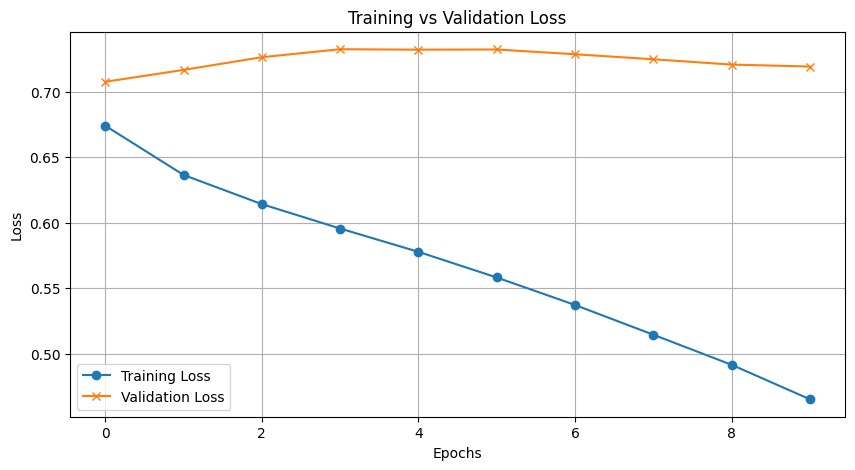

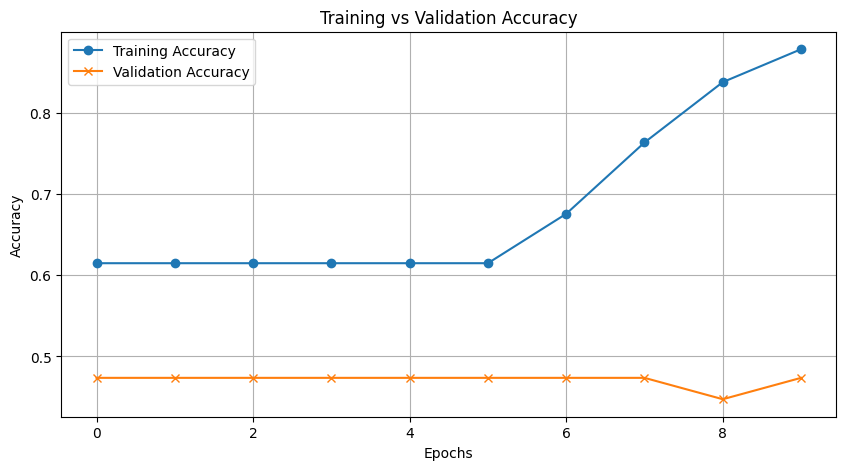

In [57]:
# 6. Xây dựng mô hình CNN
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),  # Embedding Layer
    Conv1D(filters=128, kernel_size=3, activation='relu'),  # Convolutional Layer
    GlobalMaxPooling1D(),  # Global Max Pooling
    Dense(2, activation='softmax')  # Output Layer (2 lớp)
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# 7. Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# 8. Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# 9. Lưu mô hình
model.save("cnn_comment_model.h5")
print("Mô hình đã được lưu vào file cnn_comment_model.h5")

# 10. Tạo biểu đồ so sánh Training/Validation Loss và Accuracy

# Biểu đồ Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 64)            320000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dense_19 (Dense)            (None, 2)                 258       
                                                                 
Total params: 419074 (1.60 MB)
Trainable params: 419074 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
5/5 [==============================] - 2s 125ms/step - loss: 0.6899 - accuracy: 0.5405 - val_loss: 0.7011 - val_accuracy: 0.4737
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6702 - accuracy: 0.6149 - val_loss: 0.7314 - val_accuracy: 0.47

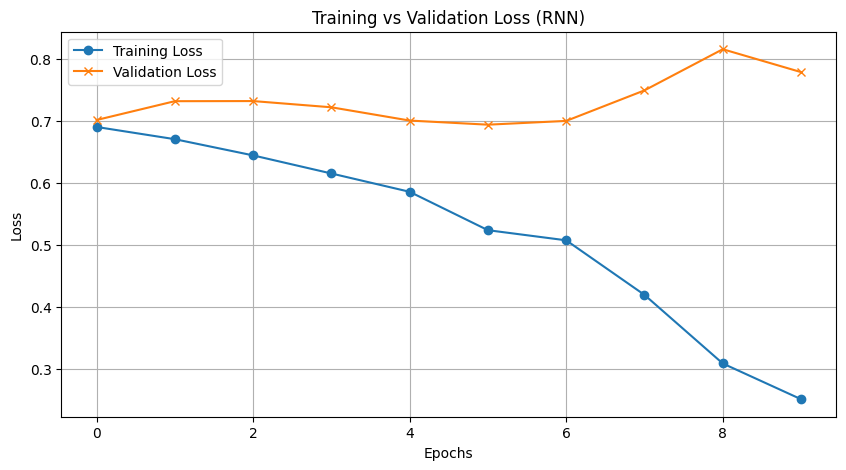

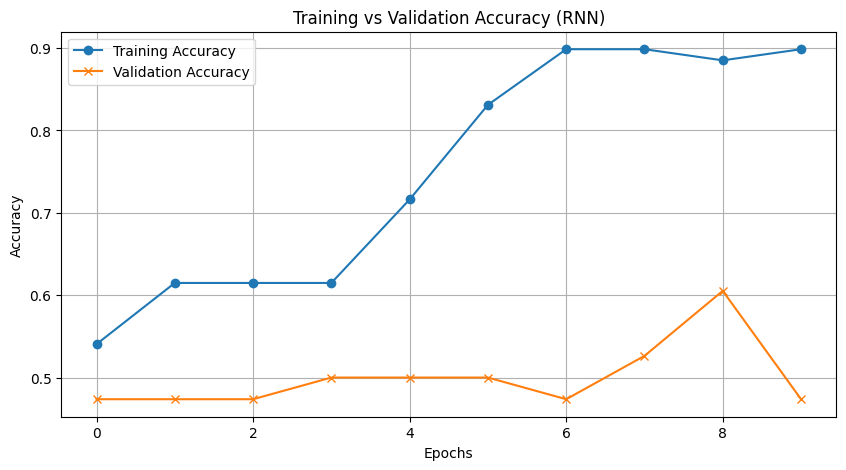

In [58]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM

# 6. Xây dựng mô hình RNN với LSTM
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),  # Embedding Layer
    LSTM(128, activation='tanh', return_sequences=False),  # LSTM Layer
    Dense(2, activation='softmax')  # Output Layer (2 lớp)
])

# Compile mô hình
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_rnn.summary())

# 7. Huấn luyện mô hình
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# 8. Đánh giá mô hình
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss_rnn}")
print(f"Test Accuracy: {test_accuracy_rnn}")

# 9. Lưu mô hình
model_rnn.save("rnn_comment_model.h5")
print("Mô hình đã được lưu vào file rnn_comment_model.h5")

# 10. Tạo biểu đồ so sánh Training/Validation Loss và Accuracy cho mô hình RNN
history_rnn_data = history_rnn.history

# Biểu đồ Loss
plt.figure(figsize=(10, 5))
plt.plot(history_rnn_data['loss'], label='Training Loss', marker='o')
plt.plot(history_rnn_data['val_loss'], label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss (RNN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_rnn_data['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_rnn_data['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title("Training vs Validation Accuracy (RNN)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, GlobalAveragePooling1D, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention
import matplotlib.pyplot as plt

# 6. Xây dựng Lớp Transformer Encoder
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)  # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Residual connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Residual connection

# 7. Xây dựng mô hình Transformer
def build_transformer_model(input_dim, embed_dim, num_heads, ff_dim, maxlen, num_classes):
    inputs = Input(shape=(maxlen,))
    embedding_layer = Embedding(input_dim=input_dim, output_dim=embed_dim, input_length=maxlen)
    x = embedding_layer(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x, training=True)  # Truyền tham số `training`
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_9 (Embedding)     (None, 50, 64)            320000    
                                                                 
 transformer_block_5 (Trans  (None, 50, 64)            83200     
 formerBlock)                                                    
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160

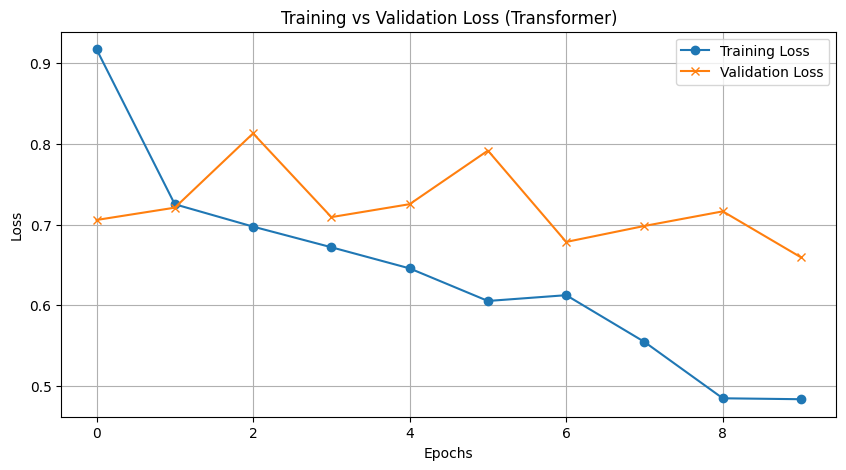

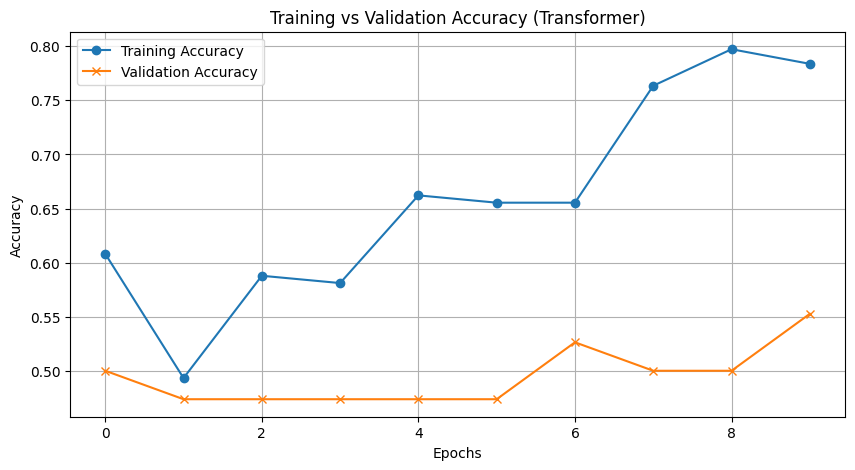

In [60]:
# Khởi tạo mô hình
model = build_transformer_model(
    input_dim=5000,  # Số lượng từ trong từ điển
    embed_dim=64,  # Kích thước embedding
    num_heads=4,  # Số lượng heads trong Multi-head Attention
    ff_dim=128,  # Kích thước feed-forward
    maxlen=50,  # Độ dài chuỗi đầu vào
    num_classes=2  # Số lớp đầu ra
)

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# 8. Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# 9. Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# 10. Lưu mô hình
model.save("transformer_comment_model.h5")
print("Mô hình đã được lưu vào file transformer_comment_model.h5")

# 11. Tạo biểu đồ so sánh Training/Validation Loss và Accuracy
history_data = history.history

# Tạo biểu đồ Loss
plt.figure(figsize=(10, 5))
plt.plot(history_data['loss'], label='Training Loss', marker='o')
plt.plot(history_data['val_loss'], label='Validation Loss', marker='x')
plt.title("Training vs Validation Loss (Transformer)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Tạo biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_data['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title("Training vs Validation Accuracy (Transformer)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Dense, Dropout
import tensorflow as tf

# Định nghĩa lớp TransformerBlock (nếu chưa có)
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)  # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Residual connection
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Residual connection

# Đọc dữ liệu đánh giá
file_path = 'shopee_comments_sentiment.csv'  # Thay bằng đường dẫn file của bạn
df = pd.read_csv(file_path)
comments = df['comment'].dropna().tolist()

# Tải mô hình đã huấn luyện (CNN)
model = load_model('transformer_comment_model.h5', custom_objects={'TransformerBlock': TransformerBlock})

# Chuẩn bị Tokenizer và padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
x_data = pad_sequences(sequences, maxlen=50)

# Dự đoán cảm xúc
predictions = model.predict(x_data)
sentiments = np.argmax(predictions, axis=1)  # 0: Tiêu cực, 1: Tích cực

# Phân tích các từ khóa trong đánh giá (từ điển)
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Lọc từ phổ biến và không có nghĩa
x = vectorizer.fit_transform(comments)
keywords = vectorizer.get_feature_names_out()

# Tư vấn sản phẩm và cải thiện dịch vụ
for i, comment in enumerate(comments):
    sentiment = sentiments[i]
    print(f"Đánh giá {i+1}: {comment}")
    
    if sentiment == 1:  # Đánh giá tích cực
        print("Cảm ơn bạn đã đánh giá tích cực!")
        # Tư vấn sản phẩm liên quan đến từ khóa
        print("Dựa trên nội dung sở thích của bạn, các sản phẩm sau có thể phù hợp:")
        for keyword in keywords:
            if keyword in comment.lower():
                print(f"- Sản phẩm với tính năng: {keyword}")
        print("Gợi ý: Các sản phẩm khác có thể phù hợp với bạn!")

    else:  # Đánh giá tiêu cực
        print("Cảm ơn bạn đã cung cấp phản hồi!")
        print("Chúng tôi sẽ cải tiến sản phẩm/dịch vụ dựa trên phản hồi này.")
        print("Chúng tôi đang nỗ lực để làm sản phẩm/dịch vụ tốt hơn.")

    print(" ")


6/6 [==============================] - 0s 11ms/step
Đánh giá 1: chất lượng sản phẩm:oke đúng với mô tả:đúng tính năng nổi bật:nút camera nói chung tui vẫn ủnh hộ iphone từ 5s đến giờ vãn không thay đổi 1 năm thay 1 cái tự thưởng cho chính mình mong năm sau vẫn có chút tiền để đổi ạ
Cảm ơn bạn đã đánh giá tích cực!
Dựa trên nội dung sở thích của bạn, các sản phẩm sau có thể phù hợp:
- Sản phẩm với tính năng: chất
- Sản phẩm với tính năng: lượng
- Sản phẩm với tính năng: mô
- Sản phẩm với tính năng: phẩm
- Sản phẩm với tính năng: sản
- Sản phẩm với tính năng: tả
- Sản phẩm với tính năng: với
- Sản phẩm với tính năng: đúng
Gợi ý: Các sản phẩm khác có thể phù hợp với bạn!
 
Đánh giá 2: đúng với mô tả:quá là đẳng cấp chất lượng sản phẩm:đẹp như ngọc trinh tính năng nổi bật:dành cho người giàu mua đầu hehe may mắn khi mua được em 16 promax 256gb gold và được giao sớm vào ngày 2709 quá là tuyệt vời bà mặt zời luôn quét mã qr để kiếm cùng em ngocnam
Cảm ơn bạn đã cung cấp phản hồi!
Chúng tôi s